# **Apply Ensemble Learning Methods on Datasets**

### **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [2]:
breast_cancer_dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

In [3]:
breast_cancer_dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
breast_cancer_dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [5]:
breast_cancer_dataset.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

It Looks Like There is No Missing Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

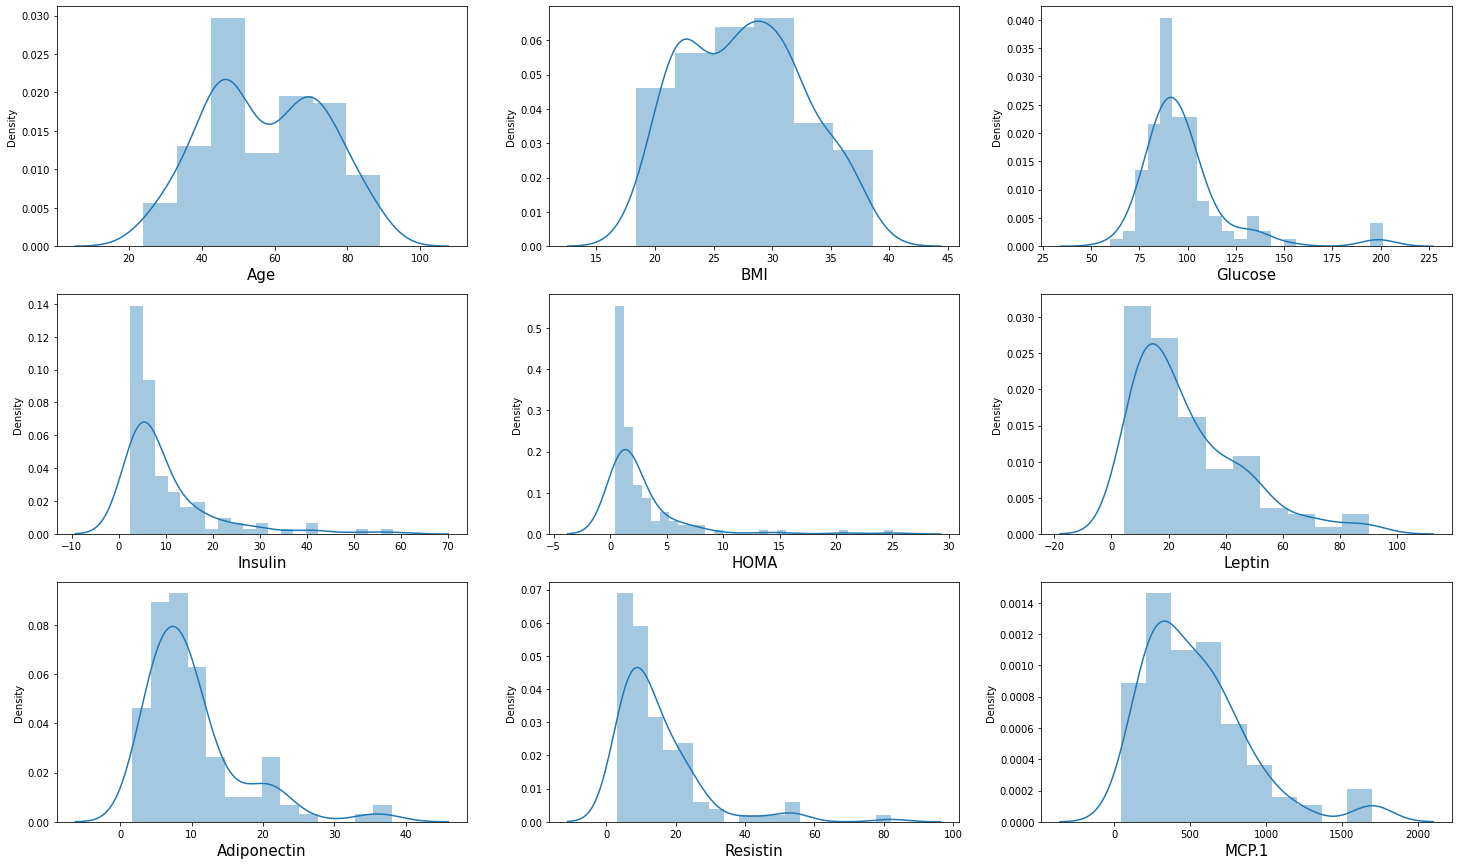

In [6]:
# Let See How Data Is Distributed in Every Column

plt.figure(figsize=(25,15))

plotnumber = 1

for column in breast_cancer_dataset:
  if plotnumber <=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(breast_cancer_dataset[column])
    plt.xlabel(column, fontsize=15)


  plotnumber+=1

plt.show();

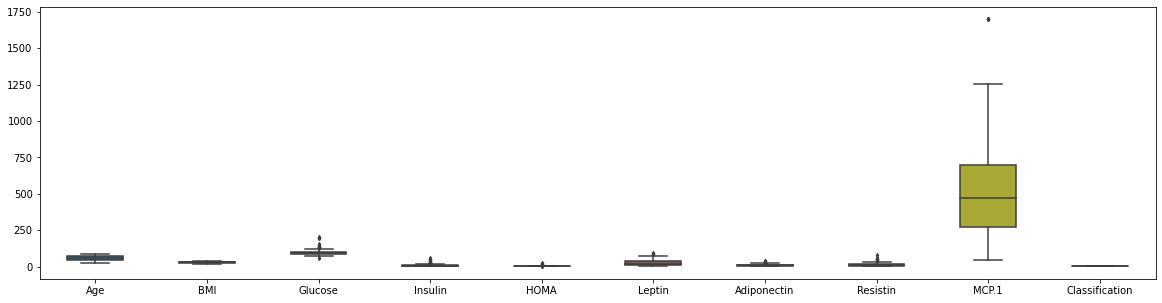

In [7]:
fig ,ax  = plt.subplots(figsize=(20,5))
sns.boxplot(data = breast_cancer_dataset, width = 0.5, ax=ax, fliersize=3)
plt.show();

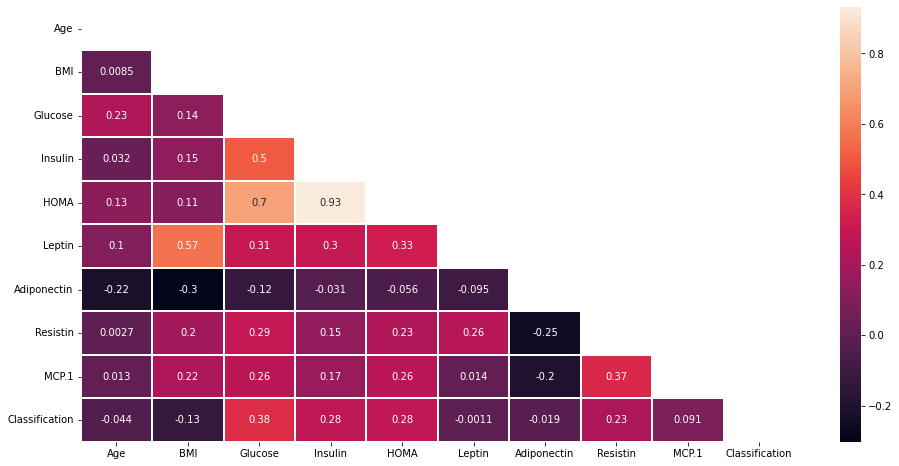

In [8]:
plt.figure(figsize = (16, 8))

corr = breast_cancer_dataset.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [9]:
X = breast_cancer_dataset.drop(columns=['Classification'])
y = breast_cancer_dataset['Classification']

### **Split The Dataset Into Train and Test data**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### **Scaling The Data**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **1- Logistic Regression**

In [12]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc * 100} % ")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc * 100} %")

Training Accuracy of Logistic Regression Model is 75.86206896551724 % 
Test Accuracy of Logistic Regression Model is 58.620689655172406 %


### **Classification Report**

In [13]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.42      0.45        12
           2       0.63      0.71      0.67        17

    accuracy                           0.59        29
   macro avg       0.57      0.56      0.56        29
weighted avg       0.58      0.59      0.58        29



# **2- KNN eighbors Classifier (KNN)**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8390804597701149
Test Accuracy of KNN Model is 0.7586206896551724


### **Classification Report**

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       0.81      0.76      0.79        17

    accuracy                           0.76        29
   macro avg       0.75      0.76      0.75        29
weighted avg       0.76      0.76      0.76        29



# **3- Support Vector Classifier**

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.896551724137931
Test Accuracy of SVC Model is 0.6896551724137931


### **Classification Report**

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        12
           2       0.72      0.76      0.74        17

    accuracy                           0.69        29
   macro avg       0.68      0.67      0.68        29
weighted avg       0.69      0.69      0.69        29



# **4- Bagging**

## **i- Support Vector Machine**

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=svm.SVC(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores_SVM = cross_val_score(bag_model, X, y, cv=5)
scores_SVM

array([0.54166667, 0.52173913, 0.39130435, 0.56521739, 0.56521739])

In [19]:
bagging_svm_score= scores_SVM.mean()

## **ii- Logistic Regression**

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import BaggingClassifier

bag_model_2 = BaggingClassifier(
    base_estimator=LogisticRegression(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores_logistics = cross_val_score(bag_model_2, X, y, cv=5)
scores_logistics

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.58333333, 0.65217391, 0.69565217, 0.73913043, 0.47826087])

In [21]:
bagging_logistics_score =scores_logistics.mean()

## **iii- K Neighbours Classifiers**

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

bag_model_3 = BaggingClassifier(
    base_estimator=KNeighborsClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores_KNN = cross_val_score(bag_model_2, X, y, cv=5)
scores_KNN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.58333333, 0.65217391, 0.69565217, 0.73913043, 0.47826087])

In [23]:
bagging_KNN_scores = scores_KNN.mean()

# **5- Stacking**

In [24]:
# let's divide our dataset into training set and holdout set by 50% 

from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [25]:
# let's split the training set again into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

## **i- K Neighbours Classifiers**

In [26]:
# using Logistic Regression and SVM algorithm as base models.
# Let's fit both of the models first on the X_train and y_train data.

lr = KNeighborsClassifier()
lr.fit(X_train, y_train)

KNeighborsClassifier()

## **ii- Support Vector Machine**

In [27]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [28]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

In [29]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [30]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

In [31]:
predict_test = np.column_stack((predict_test1, predict_test2))

## **iii- Logistic Regression**

In [32]:
rand_clf = LogisticRegression()
rand_clf.fit(predict_val, val_test)

LogisticRegression()

In [33]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.5


# **6- Boosting**

## **i-Support Vector Machine**

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

bag_model =AdaBoostClassifier(base_estimator = svm.SVC(),
                              algorithm = 'SAMME',
                              learning_rate = 0.001, 
                              n_estimators = 120)
scores_SVM_Adaboost = cross_val_score(bag_model, X, y, cv=5)
scores_SVM_Adaboost

array([0.54166667, 0.52173913, 0.56521739, 0.56521739, 0.56521739])

In [35]:
boosting_svm_scores= scores_SVM_Adaboost.mean()

## **ii- Logistics Regression**

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

bag_model =AdaBoostClassifier(base_estimator = LogisticRegression(),
                              algorithm = 'SAMME',
                              learning_rate = 0.001, 
                              n_estimators = 120)
scores_Logistic_Adaboost = cross_val_score(bag_model, X, y, cv=5)
scores_Logistic_Adaboost

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.58333333, 0.56521739, 0.60869565, 0.73913043, 0.43478261])

In [37]:
boosting_logistics_scores =scores_Logistic_Adaboost.mean()

# **7- Comparisons of Scores of Different Algos**

In [38]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Bagging_SVC', 'Bagging_LR','Bagging_KNN', 'Stacking', 'Boosting_SVM','Boosting_LR']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, bagging_svm_score, bagging_logistics_score, bagging_KNN_scores, stacking_acc, boosting_svm_scores, boosting_logistics_scores]

models = pd.DataFrame({'Model' : models, 'Score' : scores})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,0.758621
2,SVC,0.689655
4,Bagging_LR,0.629710
5,Bagging_KNN,0.629710
8,Boosting_LR,0.586232
0,Logistic Regression,0.586207
7,Boosting_SVM,0.551812
3,Bagging_SVC,0.517029
6,Stacking,0.500000


### **Bar Plot To Visualize**

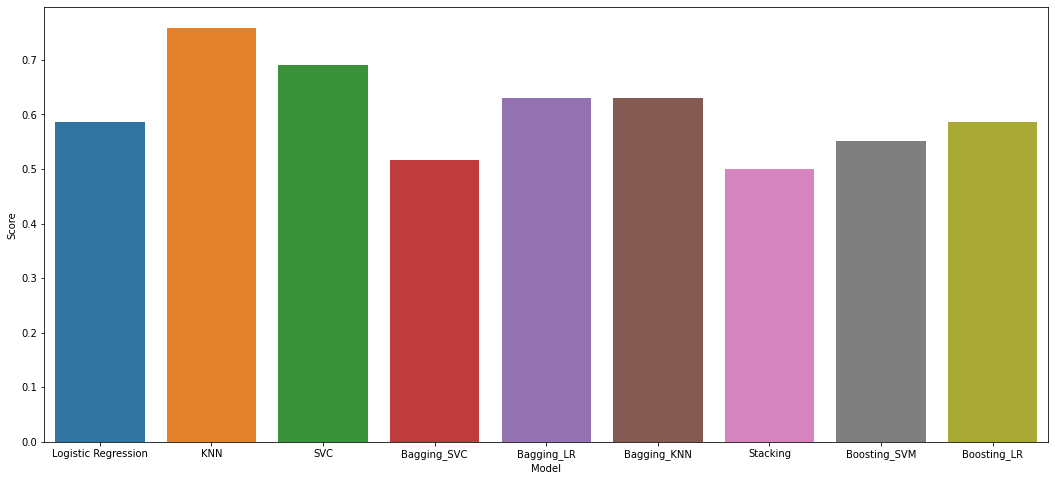

In [39]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

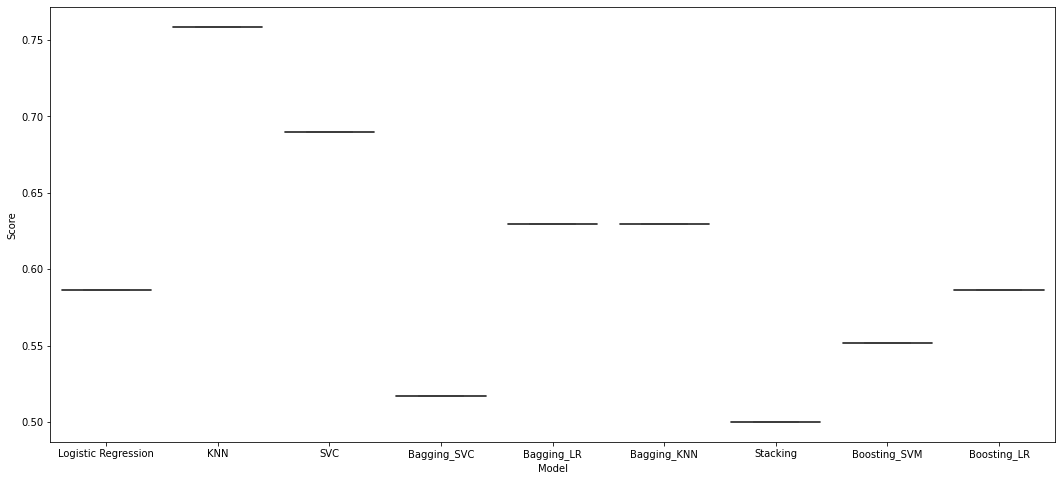

In [40]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'Model', y = 'Score', data = models)
plt.show()

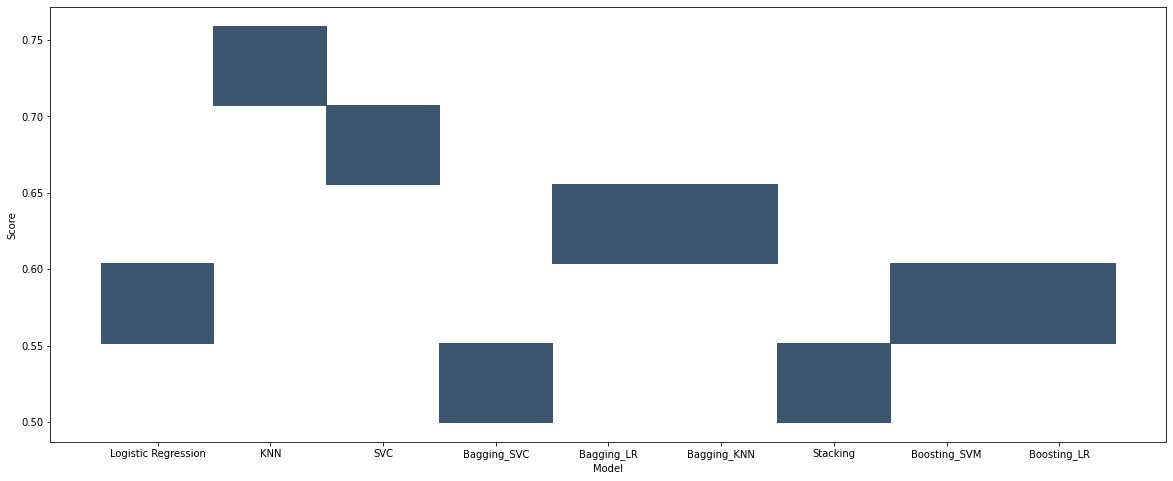

In [41]:
plt.figure(figsize = (20, 8))
sns.histplot(x = 'Model', y = 'Score', data = models)
plt.show()